In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sales = pd.read_csv('salesdata.csv')

In [16]:
sales

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Izze,[Clementine],$3.39
1,1,1,Nantucket Nectar,[Apple],$3.39
2,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
3,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
4,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
...,...,...,...,...,...
195,115,1,Steak Burrito,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",$8.99
196,116,1,Steak Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Lettuce]]",$9.25
197,117,1,Barbacoa Soft Tacos,"[Tomatillo-Red Chili Salsa (Hot), [Pinto Beans...",$8.99
198,118,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            200 non-null    int64 
 1   quantity            200 non-null    int64 
 2   item_name           200 non-null    object
 3   choice_description  200 non-null    object
 4   item_price          200 non-null    object
dtypes: int64(2), object(3)
memory usage: 7.9+ KB


In [7]:
sales.isna().sum()

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64

In [8]:
sales.describe()

,order_id,quantity
count,200.000000,200.000000
mean,62.025000,1.060000
std,34.527163,0.238083
min,1.000000,1.000000
25%,30.750000,1.000000
50%,64.500000,1.000000
75%,92.250000,1.000000
max,119.000000,2.000000


In [18]:
# changing the item_price to a float from object. so it can be used for calculations
sales['item_price'] = sales['item_price'].replace('[\$\,]', '', regex = True).astype(float)

In [19]:
sales.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Izze,[Clementine],3.39
1,1,1,Nantucket Nectar,[Apple],3.39
2,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
3,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
4,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
5,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
6,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25
7,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
8,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",8.75
9,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


In [20]:
sales.describe()

,order_id,quantity,item_price
count,200.000000,200.000000,200.000000
mean,62.025000,1.060000,8.918400
std,34.527163,0.238083,3.593724
min,1.000000,1.000000,1.090000
25%,30.750000,1.000000,8.490000
50%,64.500000,1.000000,8.990000
75%,92.250000,1.000000,10.980000
max,119.000000,2.000000,22.500000


In [22]:
sales.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Izze,[Clementine],3.39
1,1,1,Nantucket Nectar,[Apple],3.39
2,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
3,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
4,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
5,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
6,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25
7,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
8,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",8.75
9,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


In [25]:
# How many products cost more than 10.00 dollars?
sales[sales['item_price']> 10.00].count()['item_name']

60

In [26]:
# How many products cost less than 10.00 dollars?
sales[sales['item_price']< 10.00].count()['item_name']

140

In [28]:
# What is the price of each item?
sales[['item_name','item_price']]


,item_name,item_price
0,Izze,3.39
1,Nantucket Nectar,3.39
2,Chicken Bowl,16.98
3,Chicken Bowl,10.98
4,Steak Burrito,11.75
...,...,...
195,Steak Burrito,8.99
196,Steak Soft Tacos,9.25
197,Barbacoa Soft Tacos,8.99
198,Chicken Burrito,8.49


In [44]:
# Sort the products by the name of the item
sales.sort_values('item_name')

,order_id,quantity,item_name,choice_description,item_price
41,27,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75
95,61,1,Barbacoa Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
90,56,1,Barbacoa Bowl,"[Tomatillo Red Chili Salsa, [Rice, Pinto Beans...",9.25
26,19,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75
185,110,1,Barbacoa Bowl,"[Tomatillo Red Chili Salsa, [Rice, Cheese, Let...",9.25
...,...,...,...,...,...
184,110,1,Veggie Bowl,"[Roasted Chili Corn Salsa, [Rice, Pinto Beans,...",8.75
162,99,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",11.25
40,26,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
74,46,1,Veggie Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.49


In [43]:
# What was the quantity of the most expensive item ordered?
sales.sort_values(['item_price'], ascending = False).head(1)



,order_id,quantity,item_name,choice_description,item_price
153,94,2,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",22.5


In [47]:
# How many times was a chicken Burrito ordered?
sales[sales['item_name'] == 'Chicken Burrito'].count()['order_id']

39

In [50]:
# how many times did someone order more than one Canned Soda
Soda = sales[sales['item_name']== 'Canned Soda']

In [61]:
Soda.loc[Soda['quantity']> 1, 'quantity'].count()

4

In [63]:
# total sales generated by each product
sales_group = sales.groupby('item_name').sum('item_price')['item_price']

In [68]:
sales_group

item_name
Barbacoa Bowl             81.24
Barbacoa Burrito          69.23
Barbacoa Crispy Tacos     21.00
Barbacoa Soft Tacos       27.49
Canned Soda               25.07
Canned Soft Drink          1.25
Carnitas Bowl             41.47
Carnitas Burrito          39.24
Carnitas Soft Tacos        9.25
Chicken Bowl             296.90
Chicken Burrito          377.17
Chicken Crispy Tacos      26.25
Chicken Salad             10.98
Chicken Salad Bowl        62.50
Chicken Soft Tacos        46.25
Izze                      13.56
Nantucket Nectar          16.95
Steak Bowl               121.93
Steak Burrito            289.26
Steak Crispy Tacos         9.25
Steak Soft Tacos          73.22
Veggie Bowl               81.98
Veggie Burrito            30.99
Veggie Salad Bowl         11.25
Name: item_price, dtype: float64

In [66]:
# amount of unique products
sales_group.count()


24

<AxesSubplot:xlabel='item_name'>

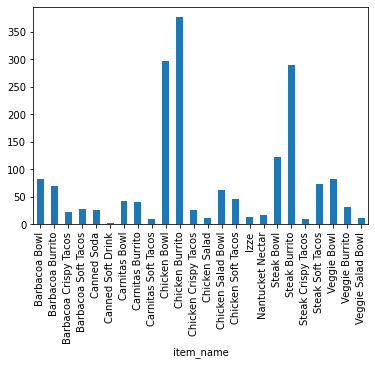

In [67]:
sales_group.plot(kind = 'bar')

* From the bar chart it is obvious that chicken Burrito generated the most sales
* Canned soft drinks generated the least sales

<AxesSubplot:xlabel='item_name'>

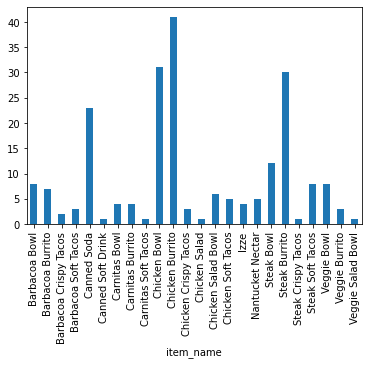

In [73]:
# a bar chart showing the total quantity of sales of each product
sales.groupby('item_name').sum('item_price')['quantity'].plot(kind = 'bar')